In [2]:
'''
【練習問題】自動車の走行距離予測

カラム	ヘッダ名称	データ型	説明
0	id	int	インデックスとして使用
1	mpg	float	ガソリン１ガロンあたりの走行距離（mile par gallon の略）
2	cylinders	varchar	シリンダー
3	displacement	float	排気量
4	horsepower	float	馬力
5	weight	float	重量
6	acceleration	float	加速度
7	model year	varchar	年式
8	origin	varchar	起源
9	car name	varchar	車名

・精度評価は、評価関数「RMSE」を使用します。
・評価値は0以上の値をとり、精度が高いほど小さな値となります。

'''

'\n【練習問題】自動車の走行距離予測\n\nカラム\tヘッダ名称\tデータ型\t説明\n0\tid\tint\tインデックスとして使用\n1\tmpg\tfloat\tガソリン１ガロンあたりの走行距離（mile par gallon の略）\n2\tcylinders\tvarchar\tシリンダー\n3\tdisplacement\tfloat\t排気量\n4\thorsepower\tfloat\t馬力\n5\tweight\tfloat\t重量\n6\tacceleration\tfloat\t加速度\n7\tmodel year\tvarchar\t年式\n8\torigin\tvarchar\t起源\n9\tcar name\tvarchar\t車名\n\n・精度評価は、評価関数「RMSE」を使用します。\n・評価値は0以上の値をとり、精度が高いほど小さな値となります。\n\n'

In [3]:
# データセットを読み込むためにpandasをインポートする
import pandas as pd

# pandasのread_csvメソッドを用いてトレーニングデータを読み込む
train_data = pd.read_csv('./train.tsv', delimiter='\t')

In [2]:
train_data

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel
...,...,...,...,...,...,...,...,...,...,...
194,384,40.8,4,85.0,65.00,2110.0,19.2,80,3,datsun 210
195,385,20.2,8,302.0,139.0,3570.0,12.8,78,1,mercury monarch ghia
196,387,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
197,395,43.4,4,90.0,48.00,2335.0,23.7,80,2,vw dasher (diesel)


In [4]:
train_data_X = train_data.iloc[:,2:]
train_data_Y = train_data.iloc[:,1]

In [5]:
train_data_X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel
...,...,...,...,...,...,...,...,...
194,4,85.0,65.00,2110.0,19.2,80,3,datsun 210
195,8,302.0,139.0,3570.0,12.8,78,1,mercury monarch ghia
196,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
197,4,90.0,48.00,2335.0,23.7,80,2,vw dasher (diesel)


In [6]:
train_data_Y

0      29.0
1      31.9
2      19.0
3      28.0
4      37.7
       ... 
194    40.8
195    20.2
196    16.0
197    43.4
198    26.0
Name: mpg, Length: 199, dtype: float64

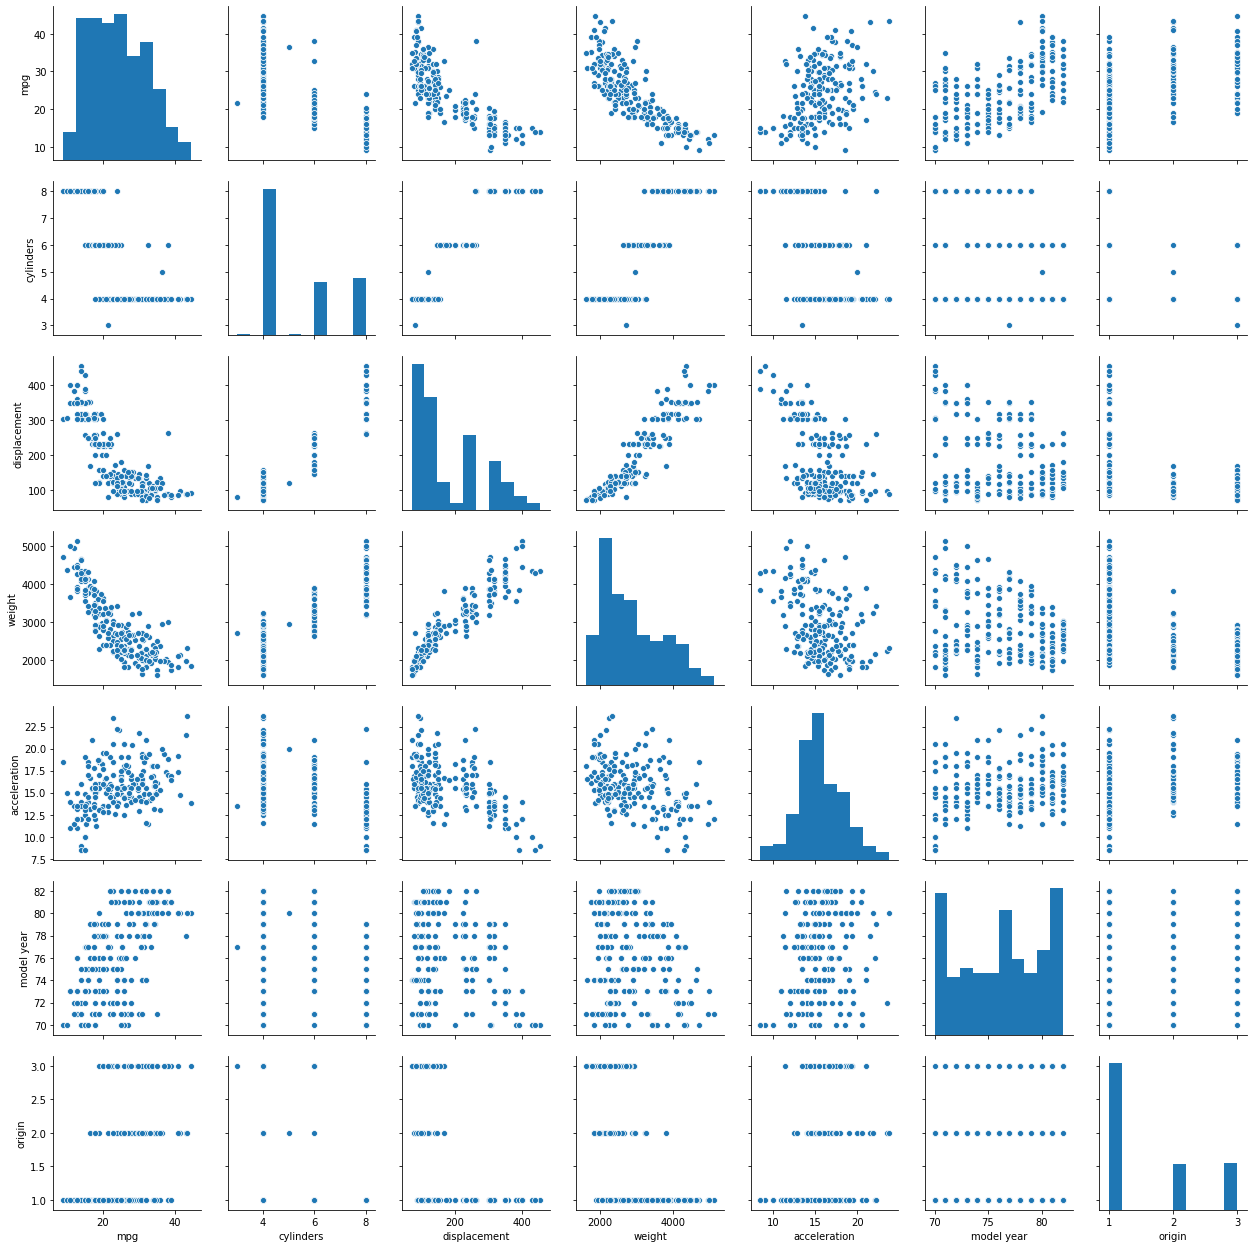

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(train_data.iloc[:,1:9])

In [23]:
train_data.iloc[:,1:2]

,mpg
0,29.0
1,31.9
2,19.0
3,28.0
4,37.7
...,...
194,40.8
195,20.2
196,16.0
197,43.4


In [ ]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
stdsc.fit_transform(train_data.iloc[:,1:1])

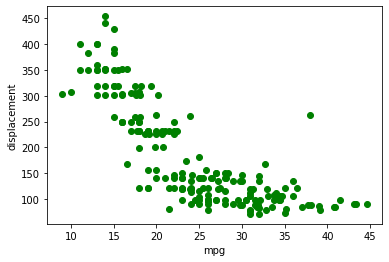

In [31]:
plt.scatter(train_data.iloc[:,1:2], train_data.iloc[:,3:4], color='green')
plt.xlabel(train_data.iloc[:,1:2].columns[0])
plt.ylabel(train_data.iloc[:,3:4].columns[0])
plt.show()

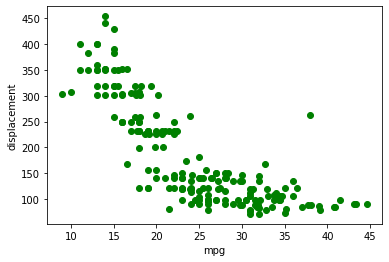

In [41]:
plt.scatter(train_data.iloc[:,1:2].values, train_data.iloc[:,3:4].values, color='green')
plt.xlabel(train_data.iloc[:,1:2].columns[0])
plt.ylabel(train_data.iloc[:,3:4].columns[0])
plt.show()

In [44]:
train_data.iloc[:,4:5].values

array([['84.00'],
       ['71.00'],
       ['108.0'],
       ['75.00'],
       ['62.00'],
       ['90.00'],
       ['105.0'],
       ['180.0'],
       ['113.0'],
       ['135.0'],
       ['120.0'],
       ['75.00'],
       ['88.00'],
       ['165.0'],
       ['100.0'],
       ['69.00'],
       ['70.00'],
       ['60.00'],
       ['80.00'],
       ['132.0'],
       ['85.00'],
       ['130.0'],
       ['93.00'],
       ['130.0'],
       ['?'],
       ['85.00'],
       ['175.0'],
       ['84.00'],
       ['100.0'],
       ['85.00'],
       ['68.00'],
       ['100.0'],
       ['71.00'],
       ['58.00'],
       ['110.0'],
       ['65.00'],
       ['110.0'],
       ['67.00'],
       ['75.00'],
       ['78.00'],
       ['48.00'],
       ['84.00'],
       ['112.0'],
       ['100.0'],
       ['86.00'],
       ['83.00'],
       ['165.0'],
       ['110.0'],
       ['60.00'],
       ['67.00'],
       ['81.00'],
       ['100.0'],
       ['82.00'],
       ['85.00'],
       ['92.00'],
       ['97.00

In [5]:
import numpy as np

type(train_data.iloc[:,4:5].values)

numpy.ndarray

In [6]:
horsepower_float = np.zeros(len(train_data.iloc[:,4:5].values))

In [28]:
for num in range(len(horsepower_float)):
    horsepower_float[num] = float(train_data.iloc[:,4:5].values[num][0])
    print(num)

horsepower_float

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


ValueError: could not convert string to float: '?'

In [25]:
train_data.iloc[:,4:5].values[1][0]

'71.00'

In [29]:
strtrain_data.iloc[:,4:5].values[24][0]

'?'